# Analog circuits and VLSI design

Analog circuits form the basis of neuromorphic vision systems. Acting similar to biological neurons, they can be used to implement the 'reactive' nature of biological vision - they respond to input in real time.

## Neuron as a Processor
One way to look at a biological neuron is as it being a processor. It takes in a signal (i.e. receptive field in a retinal neuron), processes it, and outputs a signal. 

The processor outputs a weighted sum of the input signal, where the weights are the synaptic weights of the neuron. 

### Neurons in analog circuits
This operation of calculating a weighted sum or in other words, a 'window' over the input signal is a common operation in signal processing. For example, circuits often use a operational amplifier or transconductance amplifier to weigh input signals. Another example is resistor networks that are spread out to mimick a receptive field of a retinal neuron. Lateral ingibition is another operation that helps removing the surrounding visual information around the receptive field.

A useful usecase behind this is the usage of these operations to detect edges in an image. 

## Difference of Gaussians (DoG) Edge Detector
We'll implement a DoG edge detector that will mimic how an analog circuit work when detecting edges of an image as a set of pixels.

In [4]:
!pip install cv2
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loading images (in a circuit, photodiodes would process the pixels)
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32) / 255.0 # normalize

Simulating center and surrounding receptive fields

In [8]:
# Center = narrow receptive field (excitation)
center = cv2.GaussianBlur(image, ksize=(5,5), sigmaX=1.0)

# Surround = wider receptive field (inhibition)
surround = cv2.GaussianBlur(image, ksize=(15,15), sigmaX=3.0)

# DoG = center - surround (lateral inhibition)
dog = center - surround

Visualizing results with 'neuron firing threshold' 

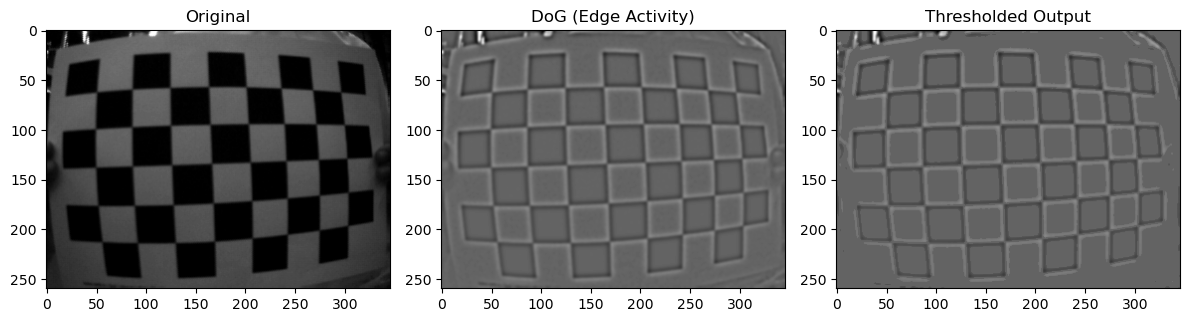

In [11]:
# Emulate a neuron's threshold: fire only if strong contrast
threshold = 0.03  # You can tune this
edge_map = np.where(np.abs(dog) > threshold, dog, 0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('DoG (Edge Activity)')
plt.imshow(dog, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Thresholded Output')
plt.imshow(edge_map, cmap='gray')

plt.tight_layout()
plt.show()
